In [1]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [3]:
# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

In [4]:
networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []

In [5]:
# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:2.40990535037791
Momentum:2.3047982700732152
AdaGrad:2.443398271732282
Adam:2.1741633809055108
===========iteration:100===========
SGD:1.3467130374985992
Momentum:0.3671050210149368
AdaGrad:0.09368253501211361
Adam:0.2221233717247831
===========iteration:200===========
SGD:0.7001421027843766
Momentum:0.2482615767946672
AdaGrad:0.11908218111812269
Adam:0.20916245769608446
===========iteration:300===========
SGD:0.5755132800030278
Momentum:0.36858157545901205
AdaGrad:0.15758812494568133
Adam:0.2317727303366235
===========iteration:400===========
SGD:0.461685876776735
Momentum:0.25040174489722034
AdaGrad:0.09455898970311333
Adam:0.1983402912098929
===========iteration:500===========
SGD:0.28699782168066207
Momentum:0.11571184352326744
AdaGrad:0.036528903488449366
Adam:0.0672808328631827
===========iteration:600===========
SGD:0.35390541107816403
Momentum:0.15387014843338223
AdaGrad:0.07779491298688128
Adam:0.1557857109396607
===========iteration:700==

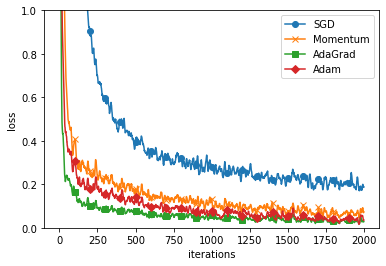

In [6]:
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()